<a href="https://colab.research.google.com/github/Ranjankrishna1729/datascience/blob/main/pizzasales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pizza-sales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5159935%2F8620207%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240615%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240615T112034Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D47a8ceb4e2c0987045ae0575f3df62e25e7c5cbd38638ff08d9d39becf3ab9ce01c1f4c0f1d6a8fb3432f0160e8f931f0e2e7f8ee05db6a16af7bab18392fce18259aa9d5ba9129216144457890196a562f8f80d457f02410320a1d85cff98f85227951b990fa0edd5ae485192bfcbfa0ead55a4a4ed7bc3a6959e7d431a9a4404315313ca49029fa2dc6a6ff75fcb9881729288d1159fb14f7963738f254cf2f54c3741750214e72c9e82fd3a203a33591f26f6edc2b67edefb502af48e60e2dff05ccdd2d37daa731d89ad044b9425aff9032768d2a9852f839257242af676bb65d419ef1c6fb705a1adaf2a138efda233d9b7565055fecdeef4024e93800e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 599566 bytes downloaded
Downloaded and uncompressed: pizza-sales
Data source import complete.


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
f_name = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        f_name = os.path.join(dirname, filename)

In [4]:
df=pd.read_csv(f_name)
df.head(3)

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00


In [5]:
df.shape

(49574, 9)

In [6]:
#check whether column 1 and 2 are same
df[df['Unnamed: 0']==df['X']].shape[0]/df.shape[0]
#both columns are same
#we can drop either of them

1.0

In [7]:
#lets drop column 'Unnamed: 0' from dataframe
df=df.drop(columns='Unnamed: 0')
df.head()

,X,id,date,time,name,size,type,price
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [8]:
df.iloc[:,1:].duplicated().sum()
#these duplicates are due to repeated item in the same order id

954

In [9]:
#check for duplicates at over all level
df.duplicated().sum()
##no duplicate rows in the dataframe

0

In [10]:
#check datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       49574 non-null  int64  
 1   id      49574 non-null  object 
 2   date    49574 non-null  object 
 3   time    49574 non-null  object 
 4   name    49574 non-null  object 
 5   size    49574 non-null  object 
 6   type    49574 non-null  object 
 7   price   49574 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


In [11]:
#date and time columns are in object datatype.These columns can be converted into date and time format
from datetime import datetime
df['date']=pd.to_datetime(df['date'])

In [12]:
df['hour']=[x.hour for x in pd.to_datetime(df['time'])]
df.head(3)

<ipython-input-12-cff361b68c9b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour']=[x.hour for x in pd.to_datetime(df['time'])]


,X,id,date,time,name,size,type,price,hour
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,11
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,11
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,11


In [13]:
df['day_of_week']=df['date'].dt.day_name()
df.head(3)

,X,id,date,time,name,size,type,price,hour,day_of_week
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,11,Thursday
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,11,Thursday
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,11,Thursday


# EDA

<Axes: xlabel='type', ylabel='count'>

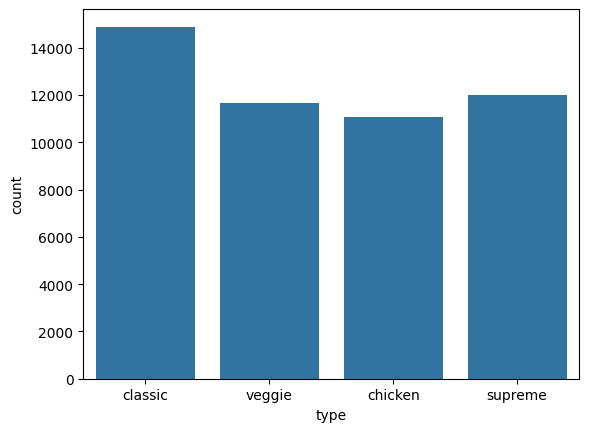

In [14]:
#check most sold type of pizza
import seaborn as sns
sns.countplot(data=df,x='type')
##classic is the most selling pizza.

<Axes: xlabel='type', ylabel='price'>

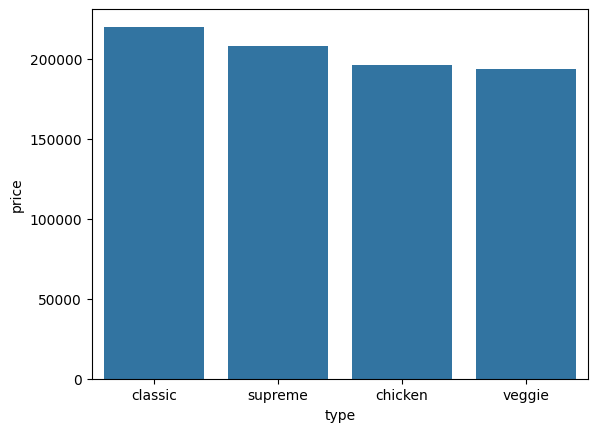

In [15]:
#check which type of pizza is bringing highest revenue
df1=df.groupby('type')['price'].sum().reset_index()
df1=df1.sort_values('price',ascending=False)
sns.barplot(data=df1,x='type',y='price')
#classic is bringing highest revenue.

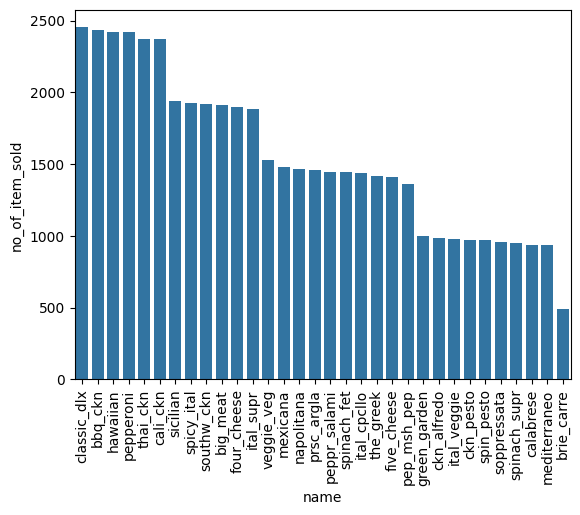

In [16]:
df1=df.groupby('name')['price'].count().reset_index()
df1=df1.sort_values('price',ascending=False)
sns.barplot(data=df1,x='name',y='price')
plt.xticks(rotation=90)
plt.ylabel('no_of_item_sold')
plt.show()

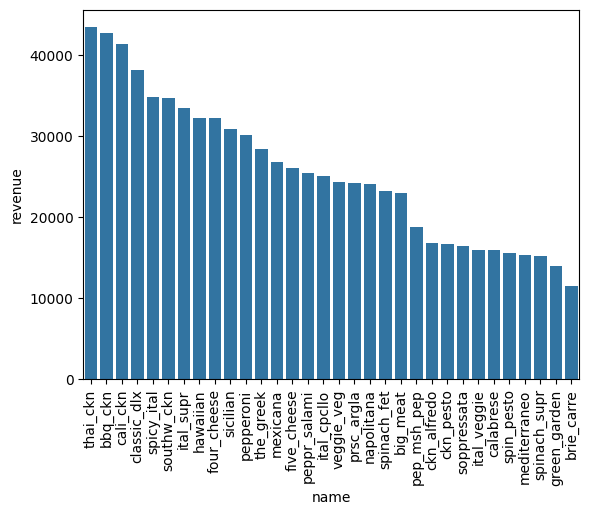

In [17]:
df1=df.groupby('name')['price'].sum().reset_index()
df1=df1.sort_values('price',ascending=False)
sns.barplot(data=df1,x='name',y='price')
plt.xticks(rotation=90)
plt.ylabel('revenue')
plt.show()
#observations:
#thai_ckn,bbq_ckn and cali_ckn are the top 3 items in terms of revenue

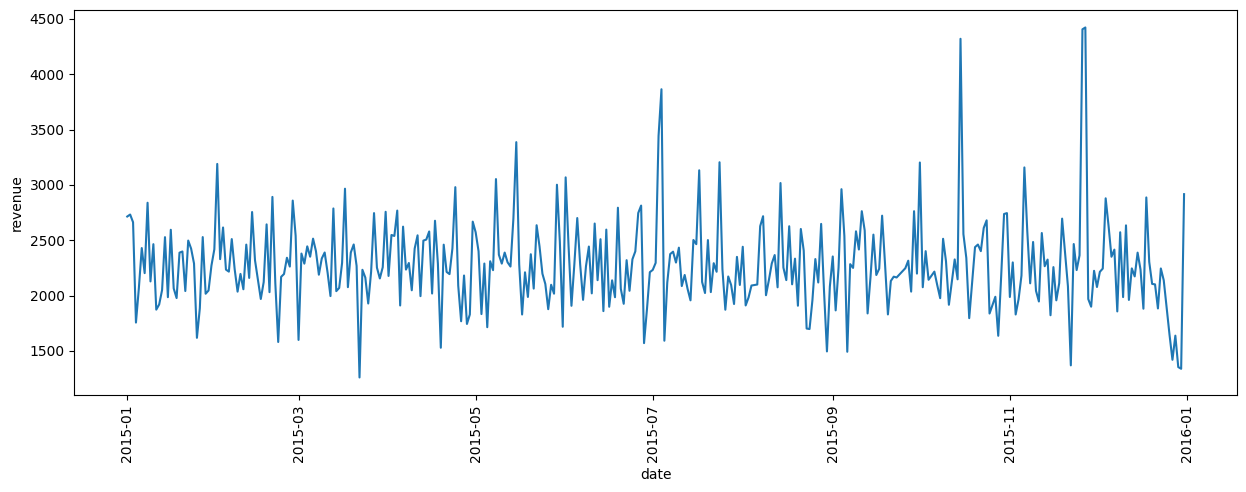

In [18]:
df1=df.groupby('date')['price'].sum().reset_index()
df1=df1.sort_values('date',ascending=True)
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='date',y='price')
plt.xticks(rotation=90)
plt.ylabel('revenue')
plt.show()
#the lineplot

In [19]:
df1['revenue_rolling_7']=df1['price'].rolling(7).mean()
df1['revenue_rolling_30']=df1['price'].rolling(30).mean()

<Axes: xlabel='date', ylabel='revenue_rolling_7'>

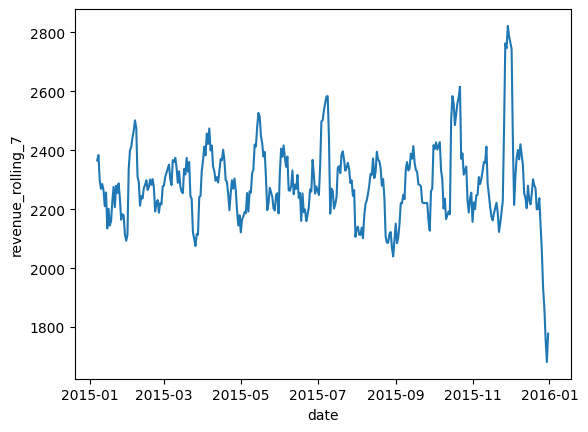

In [20]:
sns.lineplot(data=df1,x='date',y='revenue_rolling_7')

<Axes: xlabel='date', ylabel='revenue_rolling_30'>

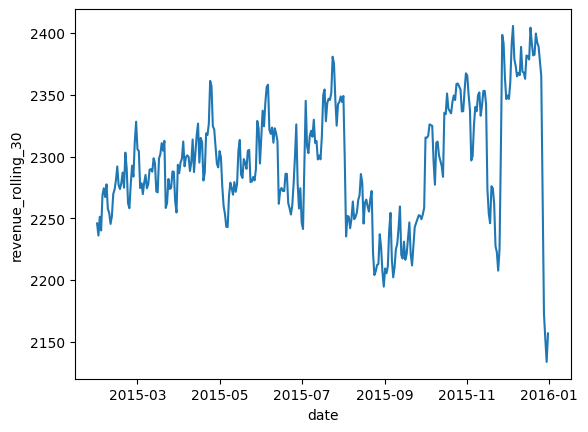

In [21]:
sns.lineplot(data=df1,x='date',y='revenue_rolling_30')
#their is a dip in the revenue during the month of september 2015
#need to look at the reason for dip in the revenue

<Axes: xlabel='day_of_week', ylabel='price'>

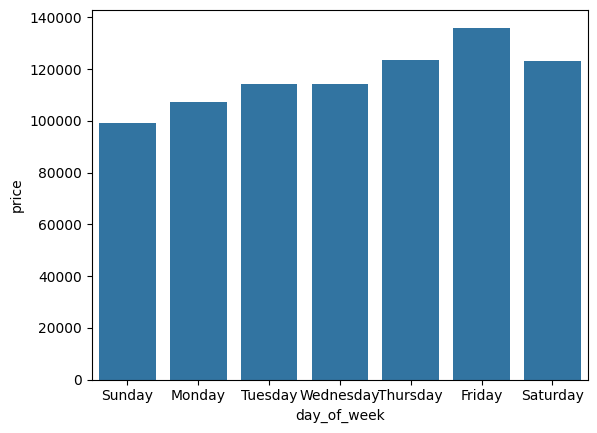

In [22]:
#check whether sales of pizza depends on day of the week
df1=df.groupby('day_of_week')['price'].sum().reset_index()
sns.barplot(data=df1,x='day_of_week',y='price',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
#the amount of sales reachs its peak on friday and reach minimum on sunday

<Axes: xlabel='day_of_week', ylabel='price'>

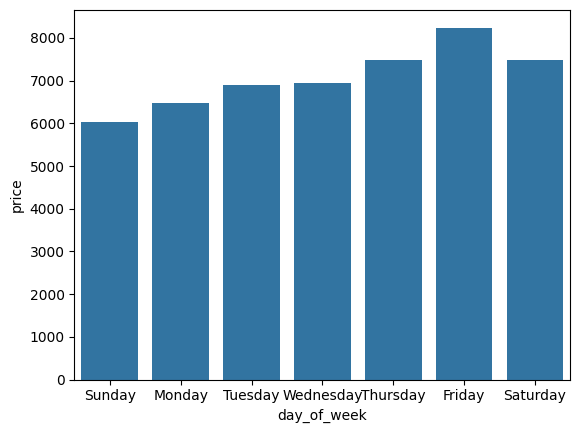

In [23]:
df1=df.groupby('day_of_week')['price'].count().reset_index()
sns.barplot(data=df1,x='day_of_week',y='price',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

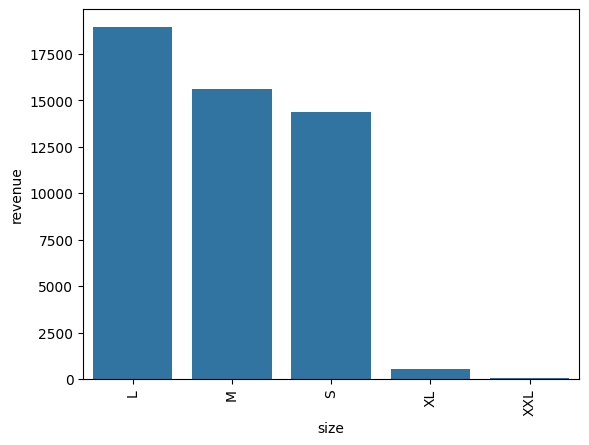

In [24]:
#size preference
df1=df.groupby('size')['price'].count().reset_index()
df1=df1.sort_values('price',ascending=False)
sns.barplot(data=df1,x='size',y='price')
plt.xticks(rotation=90)
plt.ylabel('revenue')
plt.show()
##people prefer to eat large pizzas.

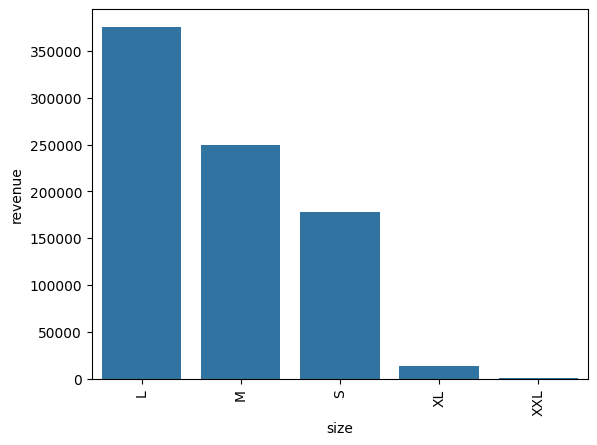

In [25]:
#REVENUE based on size of pizza
df1=df.groupby('size')['price'].sum().reset_index()
df1=df1.sort_values('price',ascending=False)
sns.barplot(data=df1,x='size',y='price')
plt.xticks(rotation=90)
plt.ylabel('revenue')
plt.show()
#large pizza fetch most of the revenue

<Axes: xlabel='hour', ylabel='price'>

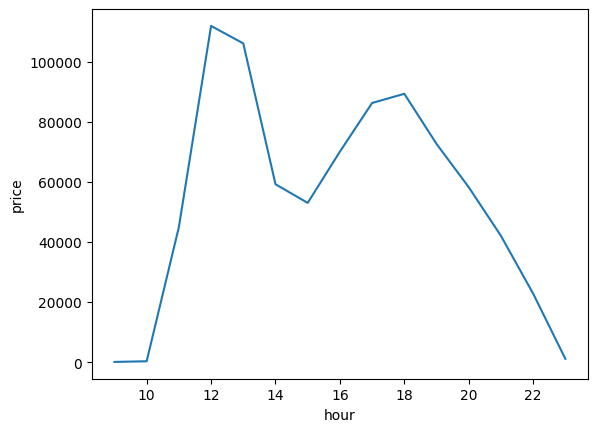

In [26]:
#analysing sales of pizza based on hour of the day
df1=df.groupby('hour')['price'].sum().reset_index()
df1=df1.sort_values('hour')
sns.lineplot(data=df1,x='hour',y='price')
#the customers foot fall reachs peak at 12pm in afternoon and at 6pm in the evening.
#customers prefer to have pizzas for their lunch and evening snacks
#number of customers before 10am is nearly zero.This indicates that the shop will open on 10 am in the morning.

<Axes: xlabel='no_of_items_per_order', ylabel='Count'>

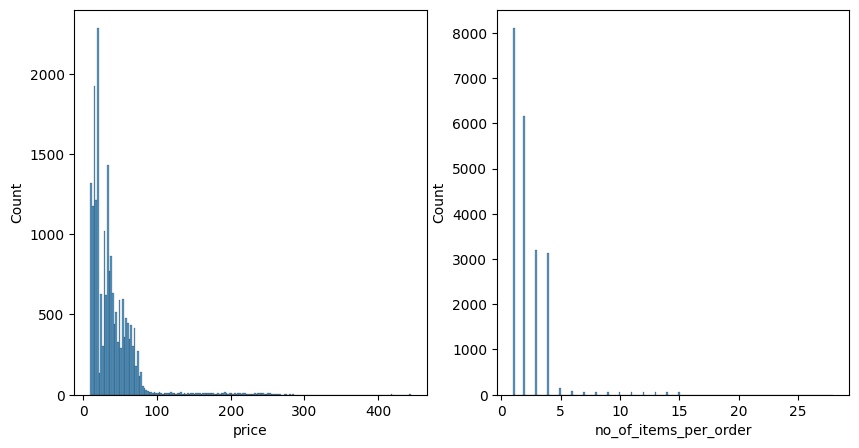

In [27]:
#lets group by order id and look at average order amount per order id and number of items ordered in each order id.
df1=df.groupby('id').agg({'price':'sum','time':'count'}).reset_index()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df1,x='price')
plt.subplot(1,2,2)
plt.xlabel('no_of_items_per_order')
sns.histplot(data=df1,x='time')


<Axes: xlabel='no_of_items_per_order'>

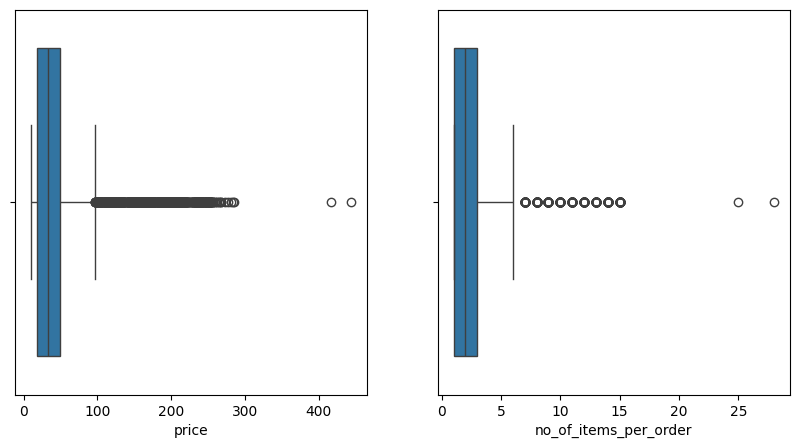

In [28]:
df1=df.groupby('id').agg({'price':'sum','time':'count'}).reset_index()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df1,x='price')
plt.subplot(1,2,2)
plt.xlabel('no_of_items_per_order')
sns.boxplot(data=df1,x='time')
#median number of item per order is less than 2
#median amount spent on each order is around 25 dollars
##most of the customers afford $25 and tend to order atleast 2 pizzas.Try to keep the price of pizza around $13 to maximize the profit

In [29]:
#lets create clusters and analyse thier preferences
df1=df[['type','size','price','hour']]
df1=pd.get_dummies(df1,columns=['type','size'],dtype=int)
df1.head(4)

,price,hour,type_chicken,type_classic,type_supreme,type_veggie,size_L,size_M,size_S,size_XL,size_XXL
0,13.25,11,0,1,0,0,0,1,0,0,0
1,16.00,11,0,1,0,0,0,1,0,0,0
2,16.00,11,0,0,0,1,0,1,0,0,0
3,20.75,11,1,0,0,0,1,0,0,0,0


In [30]:
#scaling the data using min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col=df1.columns
transformed_data=scaler.fit_transform(df1)
df1=pd.DataFrame(data=transformed_data)
df1.columns=col
df1.head()

,price,hour,type_chicken,type_classic,type_supreme,type_veggie,size_L,size_M,size_S,size_XL,size_XXL
0,0.133588,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.238550,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238550,0.142857,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.419847,0.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.333969,0.142857,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

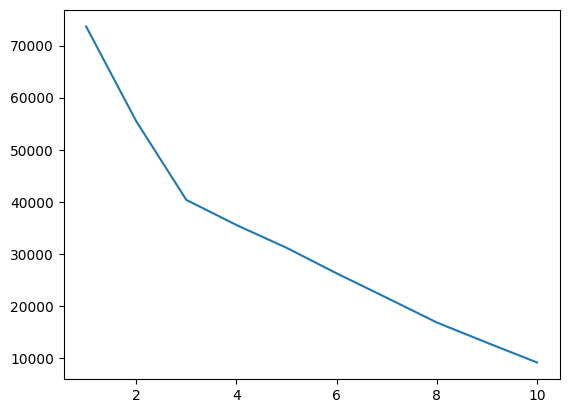

In [31]:
#kmeans clustering algorithm
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++', random_state = 42,n_init='auto')
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
sns.lineplot(x=range(1,11),y=wcss)

<Axes: >

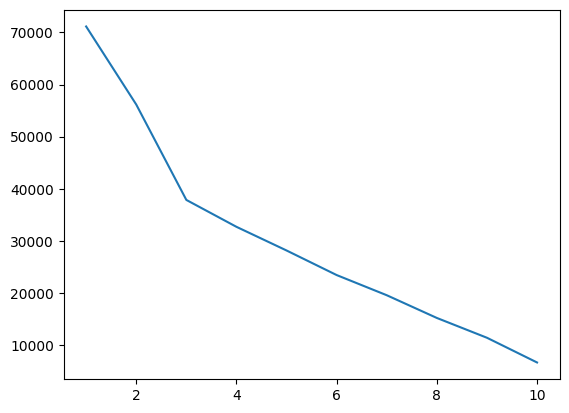

In [32]:
#kmeans clustering algorithm
#lets remove feture hour from the dataframe and check performance of clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++', random_state = 42,n_init='auto')
    kmeans.fit(df1.drop(columns='hour'))
    wcss.append(kmeans.inertia_)
sns.lineplot(x=range(1,11),y=wcss)
##Here for both the cases .optimum number of clusters is 3.

In [33]:
#lets take these clusters and analyse their characteristics
kmeans=KMeans(n_clusters=3,n_init='auto')
y_pred=kmeans.fit_predict(df1)
df1['cluster_assigned']=y_pred
df1.head(3)

,price,hour,type_chicken,type_classic,type_supreme,type_veggie,size_L,size_M,size_S,size_XL,size_XXL,cluster_assigned
0,0.133588,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.238550,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.238550,0.142857,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [34]:
df2=df1.drop(columns='hour')

In [35]:
df2.groupby('cluster_assigned').mean().reset_index()

,cluster_assigned,price,type_chicken,type_classic,type_supreme,type_veggie,size_L,size_M,size_S,size_XL,size_XXL
0,0,0.383567,0.260181,0.214022,0.240768,0.285028,1.0,0.0,0.000000,0.000000,0.000000
1,1,0.236651,0.249057,0.263000,0.258778,0.229165,0.0,1.0,0.000000,0.000000,0.000000
2,2,0.119919,0.148435,0.448442,0.225389,0.177735,0.0,0.0,0.961289,0.036842,0.001869


### Observations:
- 1.Cluster 1:Customers who love large pizza.
- 2.Cluster 2:Customers who love medium size pizza.
- 3.Cluster 3:Customers who doesn't belong to cluster 1 and 2.It is a mix of customers who prefer pizza other than medium and large size.

# Recommendations:
- 1.Demand for pizza is high during 12 pm in the afternoon and 5 pm in the evening.Focus on handling huge demand during these peak hours.
- 2.Demand for the pizza peaks on friday.Try to keep sufficient inventory to handle friday peak demand.
- 3.We can cluster the customers into 3 categories.The customers who loves large pizza,medium pizza and other pizzas.
- 4.Try to promote large and medium pizza among the customers who belongs to cluster 3.This will inturn increase the revenue(price is directy proportional to size of the pizza)